### **CC57 - MACHINE LEARNING - APRENDIZAJE POR REGLAS DE ASOCIACION**

**0. Conjunto de Datos**

Crearemos el siguiente dataset de transacciones de compras de bebidas para luego aplicar el **algoritmo Apriori**.

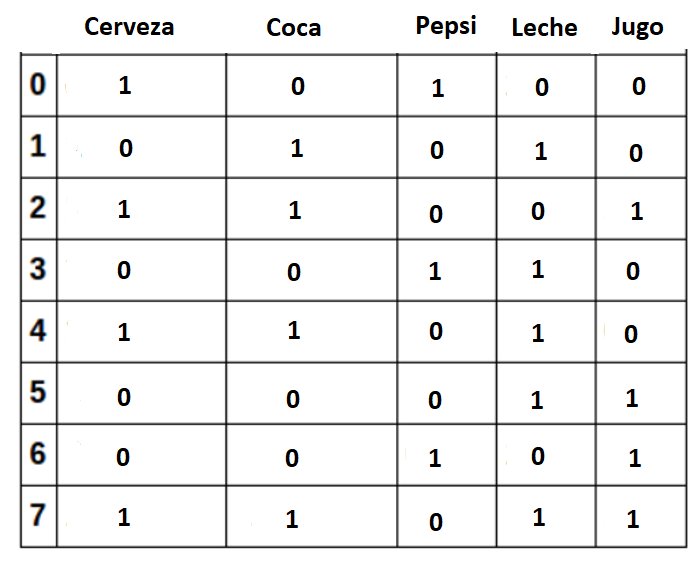

Observamos que el dataset cuenta con 4 atributos en 8 observaciones.

In [2]:
import numpy as np
import scipy as sc
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import OrderedDict
from fractions import Fraction

**1. Carga de Datos y Procesamiento**

In [5]:
#conjunto de datos
transaction_df = pd.DataFrame({'cerveza': [1,0,1,0,1,0,0,1],
                               'coca': [0,1,1,0,1,0,0,1],
                               'pepsi': [1,0,0,1,0,0,1,0],
                               'leche': [0,1,0,1,1,1,0,1],
                               'jugo': [0,0,1,0,0,1,1,1]})

**Soporte**

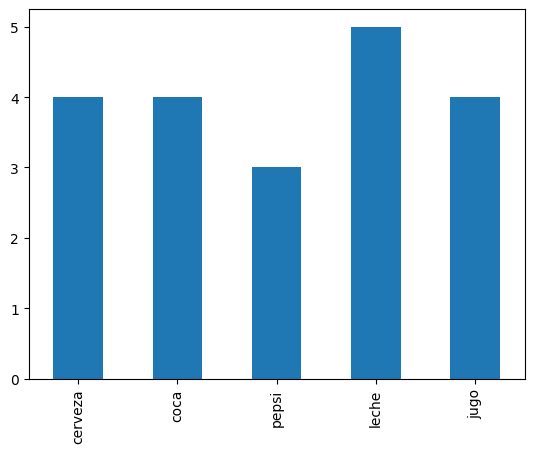

In [6]:
#calcula ocurrencias (support)
product_support_dict={}
for column in transaction_df.columns:
  product_support_dict[column]=sum (transaction_df [column]>0)

# visualizar el soporte
pd.Series (product_support_dict).plot(kind="bar")
plt.show()

**Algoritmo Apriori**

In [11]:
#Algoritmo Apriori

#tomar matriz de datos del marco de datos
transaction_matrix = transaction_df.to_numpy()
# obtener el número de filas y columnas
fil, col = transaction_matrix.shape
# iniciar nueva matriz
frecuente_items_matrix = np.zeros((col,col))
# comparar cada producto con cada otro
for esta_columna in range (0, col-1):
   for siguiente_columna in range (esta_columna + 1, col):
      # multiplicar vectores de pares de productos
      vector_producto = transaction_matrix[:,esta_columna] * transaction_matrix[:,siguiente_columna]
      # comprobar el número de apariciones de pares en cestas
      count_matches = sum((vector_producto)>0)
      #guardar valores en una nueva matriz
      frecuente_items_matrix[esta_columna,siguiente_columna] = count_matches

[[0. 3. 1. 2. 2.]
 [0. 0. 0. 3. 2.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]]


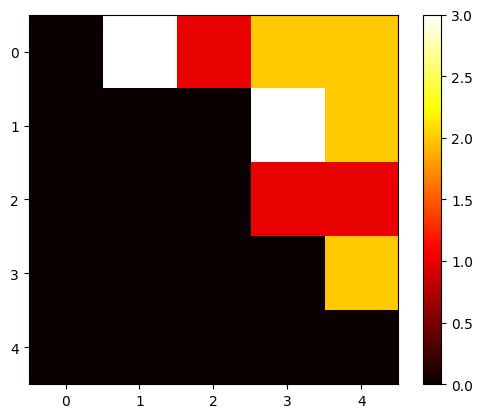

In [15]:
print (frecuente_items_matrix)

plt.imshow(frecuente_items_matrix, cmap="hot")
plt.colorbar()
#plot_matrix(frecuente_items_matrix)
plt.show()

**Items mas frecuentes**

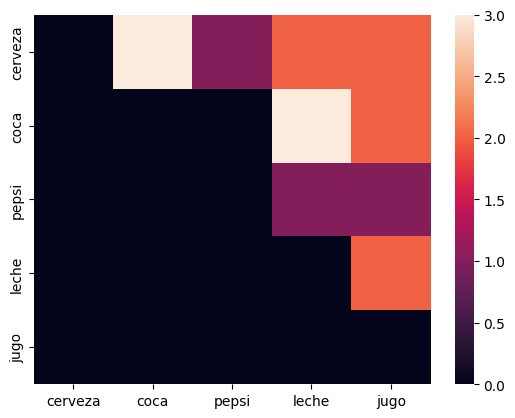

In [20]:
# y finalmente combinar nombres de productos con datos

elementos_frecuentes_df = pd.DataFrame(frecuente_items_matrix,
                                       columns = transaction_df.columns.values,
                                       index = transaction_df.columns.values)

#visualizando el resultado final
sns.heatmap(elementos_frecuentes_df)
plt.show()

**Extraccion de Items Frecuentes**

In [21]:
product_names= transaction_df.columns.values

#extraer pares de productos con minima frecuencia de apariciones en la cesta de frecuencia mínima (umbral)
def extraer_pares(umbral):
    salida = {}

    #seleccione índices con n mayor o igual
    lista_coord_matriz = np.where (frecuente_items_matrix >= umbral)
    #tomar valores
    fila_coords = lista_coord_matriz[0]
    columna_coords = lista_coord_matriz[1]

    # generar pares
    for index, valor in enumerate(fila_coords):
        #imprimir índice
        fila = fila_coords [index]
        columna = columna_coords [index]
        # obtener nombres de productos
        primer_producto = product_names[fila]
        segundo_producto = product_names[columna]

        #número de coincidencias en la canasta
        coincidencias = frecuente_items_matrix[fila,columna]
        # poner valores clave en dict
        salida[primer_producto+"-"+segundo_producto] = coincidencias

    # devolver diccionario ordenado
    sorted_output = OrderedDict (sorted (salida.items(), key=lambda x: x[1]))
    return sorted_output

OrderedDict([('cerveza-pepsi', 1.0), ('pepsi-leche', 1.0), ('pepsi-jugo', 1.0), ('cerveza-leche', 2.0), ('cerveza-jugo', 2.0), ('coca-jugo', 2.0), ('leche-jugo', 2.0), ('cerveza-coca', 3.0), ('coca-leche', 3.0)])


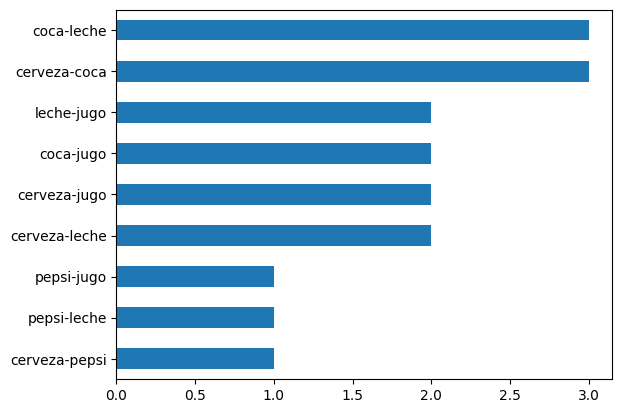

In [22]:
#Ejecutamos la funcion

print(extraer_pares(1))

# pares de tramas con frecuencia mínima de partidos de 1 canasta
pd.Series(extraer_pares(1)).plot(kind="barh")
plt.show()